In [69]:
import pandas as pd
matches = pd.read_csv(r"C:\Users\krawc\OneDrive\Documents\code\pythons\predictor\data\match_w_pred_2223diff_trsh.csv", index_col=0)
matches

,team,date,time,round,day,venue,result,gf,ga,opponent,target,venue_code,key,y_pred,y_prob
0,Arsenal,2022-08-05,20:00:00,Matchweek 1,Fri,Away,W,2,0,Crystal Palace,1,0,2022-08-05 Arsenal-Crystal Palace,0,0.064119
1,Arsenal,2022-08-13,15:00:00,Matchweek 2,Sat,Home,W,4,2,Leicester City,1,1,2022-08-13 Arsenal-Leicester City,0,0.213724
2,Arsenal,2022-08-20,17:30:00,Matchweek 3,Sat,Away,W,3,0,Bournemouth,1,0,2022-08-20 Arsenal-Bournemouth,0,0.044562
3,Arsenal,2022-08-27,17:30:00,Matchweek 4,Sat,Home,W,2,1,Fulham,1,1,2022-08-27 Arsenal-Fulham,0,0.011619
4,Arsenal,2022-08-31,19:30:00,Matchweek 5,Wed,Home,W,2,1,Aston Villa,1,1,2022-08-31 Arsenal-Aston Villa,0,0.152427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Wolves,2023-04-29,15:00:00,Matchweek 34,Sat,Away,L,0,6,Brighton,0,0,2023-04-29 Wolves-Brighton,0,0.215659
756,Wolves,2023-05-06,15:00:00,Matchweek 35,Sat,Home,W,1,0,Aston Villa,1,1,2023-05-06 Wolves-Aston Villa,1,0.634185
757,Wolves,2023-05-13,15:00:00,Matchweek 36,Sat,Away,L,0,2,Manchester Utd,0,0,2023-05-13 Wolves-Manchester Utd,0,0.304085
758,Wolves,2023-05-20,15:00:00,Matchweek 37,Sat,Home,D,1,1,Everton,0,1,2023-05-20 Wolves-Everton,1,0.600756


In [70]:
odds = pd.read_csv(r"C:\Users\krawc\OneDrive\Documents\code\pythons\predictor\data\match_w_odds_2223.csv", index_col=[0,1,2])
odds

date  \
league             season game                                                      
ENG-Premier League 2223   2022-08-05 Crystal Palace-Arsenal   2022-08-05 20:00:00   
                          2022-08-06 Bournemouth-Aston Villa  2022-08-06 15:00:00   
                          2022-08-06 Everton-Chelsea          2022-08-06 17:30:00   
                          2022-08-06 Fulham-Liverpool         2022-08-06 12:30:00   
                          2022-08-06 Leeds United-Wolves      2022-08-06 15:00:00   
...                                                                           ...   
                          2023-05-28 Everton-Bournemouth      2023-05-28 16:30:00   
                          2023-05-28 Leeds United-Tottenham   2023-05-28 16:30:00   
                          2023-05-28 Leicester City-West Ham  2023-05-28 16:30:00   
                          2023-05-28 Manchester Utd-Fulham    2023-05-28 16:30:00   
                          2023-05-28 Southampton-Liverpool    2023-05-28 16:30:00   

                                                                   home_team  \
league             season game                                                 
ENG-Premier League 2223   2022-08-05 Crystal Palace-Arsenal   Crystal Palace   
                          2022-08-06 Bournemouth-Aston Villa     Bournemouth   
                          2022-08-06 Everton-Chelsea                 Everton   
                          2022-08-06 Fulham-Liverpool                 Fulham   
                          2022-08-06 Leeds United-Wolves        Leeds United   
...                                                                      ...   
                          2023-05-28 Everton-Bournemouth             Everton   
                          2023-05-28 Leeds United-Tottenham     Leeds United   
                          2023-05-28 Leicester City-West Ham  Leicester City   
                          2023-05-28 Manchester Utd-Fulham    Manchester Utd   
                          2023-05-28 Southampton-Liverpool       Southampton   

                                                                away_team  \
league             season game                                              
ENG-Premier League 2223   2022-08-05 Crystal Palace-Arsenal       Arsenal   
                          2022-08-06 Bournemouth-Aston Villa  Aston Villa   
                          2022-08-06 Everton-Chelsea              Chelsea   
                          2022-08-06 Fulham-Liverpool           Liverpool   
                          2022-08-06 Leeds United-Wolves           Wolves   
...                                                                   ...   
                          2023-05-28 Everton-Bournemouth      Bournemouth   
                          2023-05-28 Leeds United-Tottenham     Tottenham   
                          2023-05-28 Leicester City-West Ham     West Ham   
                          2023-05-28 Manchester Utd-Fulham         Fulham   
                          2023-05-28 Southampton-Liverpool      Liverpool   

                                                              B365H  B365D  \
league             season game                                               
ENG-Premier League 2223   2022-08-05 Crystal Palace-Arsenal    4.20   3.60   
                          2022-08-06 Bournemouth-Aston Villa   3.75   3.50   
                          2022-08-06 Everton-Chelsea           5.50   4.00   
                          2022-08-06 Fulham-Liverpool         11.00   6.00   
                          2022-08-06 Leeds United-Wolves       2.25   3.40   
...                                                             ...    ...   
                          2023-05-28 Everton-Bournemouth       1.50   4.50   
                          2023-05-28 Leeds United-Tottenham    2.75   3.80   
                          2023-05-28 Leicester City-West Ham   1.91   3.80   
                          2023-05-28 Manchester Utd-Fulham     1.50   

In [71]:
def add_key_col(hist):
    ew_game=hist['date'] +' ' + hist['team']+'-' + hist['opponent']
    # ew_game=hist['date'].dt.date.astype('string') +' ' + hist['home_team']+'-' + hist['away_team']
    return ew_game

matches['key']=add_key_col(matches)
matches=matches.set_index('key')

In [72]:
odds2=odds.droplevel([0,1]).iloc[:,-6:]

In [73]:
matches2=matches.join(odds2,rsuffix='v').dropna()

In [74]:
c1=matches2.target==matches2.y_pred
c2=matches2.target==1
c3=matches2.y_pred==1
matches2[c1&c2]

,team,date,time,round,day,venue,result,gf,ga,opponent,target,venue_code,y_pred,y_prob,AvgH,AvgD,AvgA,pAvgH,pAvgD,pAvgA
key,,,,,,,,,,,,,,,,,,,,
2022-08-06 Bournemouth-Aston Villa,Bournemouth,2022-08-06,15:00:00,Matchweek 1,Sat,Home,W,2,0,Aston Villa,1,1,1,0.791025,3.80,3.50,2.04,0.250938,0.273271,0.475791
2022-10-08 Bournemouth-Leicester City,Bournemouth,2022-10-08,15:00:00,Matchweek 10,Sat,Home,W,2,1,Leicester City,1,1,1,0.805495,3.53,3.63,2.09,0.271446,0.263715,0.464839
2022-11-12 Bournemouth-Everton,Bournemouth,2022-11-12,15:00:00,Matchweek 16,Sat,Home,W,3,0,Everton,1,1,1,0.751822,2.86,3.25,2.60,0.335639,0.294119,0.370243
2023-04-30 Bournemouth-Leeds United,Bournemouth,2023-04-30,14:00:00,Matchweek 34,Sun,Home,W,4,1,Leeds United,1,1,1,0.819890,2.61,3.50,2.68,0.368772,0.272361,0.358867
2022-08-13 Brentford-Manchester Utd,Brentford,2022-08-13,17:30:00,Matchweek 2,Sat,Home,W,4,0,Manchester Utd,1,1,1,0.795704,3.77,3.56,2.02,0.252350,0.267833,0.479817
2022-10-18 Crystal Palace-Wolves,Crystal Palace,2022-10-18,20:15:00,Matchweek 12,Tue,Home,W,2,1,Wolves,1,1,1,0.659761,2.29,3.19,3.46,0.422750,0.300736,0.276514
2023-04-29 Crystal Palace-West Ham,Crystal Palace,2023-04-29,12:30:00,Matchweek 34,Sat,Home,W,4,3,West Ham,1,1,1,0.614883,2.70,3.18,2.81,0.356565,0.301224,0.342212
2022-09-18 Everton-West Ham,Everton,2022-09-18,14:15:00,Matchweek 8,Sun,Home,W,1,0,West Ham,1,1,1,0.763042,2.95,3.31,2.50,0.325364,0.288873,0.385763
2022-10-22 Everton-Crystal Palace,Everton,2022-10-22,15:00:00,Matchweek 13,Sat,Home,W,3,0,Crystal Palace,1,1,1,0.805158,2.58,3.18,2.96,0.373893,0.301483,0.324624


In [75]:
tobet=matches2[c3]
tobet=tobet.sort_values('date')
sc=['date','result','gf','ga','target','y_prob','pAvgH','AvgH',]
tobet=tobet[sc]

In [76]:
e=1.35
m=1.7
d=2.7
c4e=matches2['AvgH'].between(0,e,'right')
c4m=matches2['AvgH'].between(e,m,'right')
c4d=matches2['AvgH'].between(m,d,'right')
c5=matches2['AvgH']>d

In [77]:
tobet.loc[c4e,'dif_level']='E'
tobet.loc[c4m,'dif_level']='M'
tobet.loc[c4d,'dif_level']='D'
tobet.loc[c5,'dif_level']='X'

C:\Users\krawc\AppData\Local\Temp\ipykernel_6100\3724367751.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'E' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  tobet.loc[c4e,'dif_level']='E'


In [78]:

tobet['in']=100
tobet['out']=tobet['in']*tobet['AvgH']
tobet.loc[tobet['target']==0,'out']=0
tobet['win']=tobet['out']-tobet['in']
tobet['balance']=tobet.win.cumsum()
tobet

,date,result,gf,ga,target,y_prob,pAvgH,AvgH,dif_level,in,out,win,balance
key,,,,,,,,,,,,,
2022-08-06 Bournemouth-Aston Villa,2022-08-06,W,2,0,1,0.791025,0.250938,3.80,X,100,380.0,280.0,280.0
2022-08-06 Newcastle Utd-Nott'ham Forest,2022-08-06,W,2,0,1,0.709609,0.582408,1.67,M,100,167.0,67.0,347.0
2022-08-06 Tottenham-Southampton,2022-08-06,W,4,1,1,0.734120,0.717817,1.36,M,100,136.0,36.0,383.0
2022-08-06 Fulham-Liverpool,2022-08-06,D,2,2,0,0.805789,0.080928,10.99,X,100,0.0,-100.0,283.0
2022-08-06 Everton-Chelsea,2022-08-06,L,0,1,0,0.790669,0.162538,5.74,X,100,0.0,-100.0,183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-13 Southampton-Fulham,2023-05-13,L,0,2,0,0.820796,0.339963,2.82,X,100,0.0,-100.0,2764.0
2023-05-14 Everton-Manchester City,2023-05-14,L,0,3,0,0.797681,0.101877,8.86,X,100,0.0,-100.0,2664.0
2023-05-20 Wolves-Everton,2023-05-20,D,1,1,0,0.600756,0.347619,2.77,X,100,0.0,-100.0,2564.0


In [86]:
(tobet['target']==1).sum()#values.astype(int)

32

<Axes: xlabel='date'>

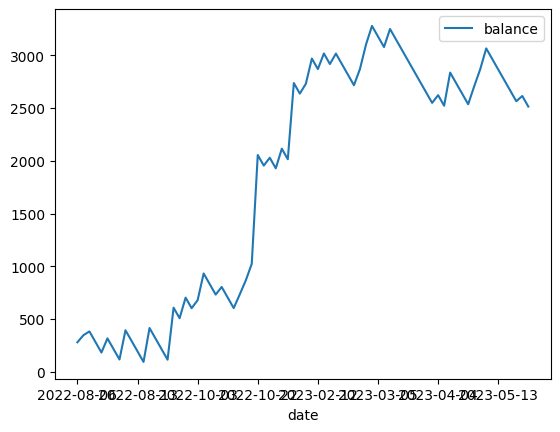

In [79]:
tobet.plot(x='date',y='balance',kind='line')

In [80]:
level_wins=tobet[c2].groupby('dif_level')['target'].sum()

C:\Users\krawc\AppData\Local\Temp\ipykernel_6100\3605488521.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  level_wins=tobet[c2].groupby('dif_level')['target'].sum()


In [81]:
level_lose=tobet[~c2].groupby('dif_level')['target'].count()
level_wins/(level_wins+level_lose)

C:\Users\krawc\AppData\Local\Temp\ipykernel_6100\1710927317.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  level_lose=tobet[~c2].groupby('dif_level')['target'].count()


dif_level
D    0.437500
M         NaN
X    0.365854
Name: target, dtype: float64